In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import pickle
from pathlib import Path
import logging
import sys
import os
import re
import cv2
sys.path.insert(0, '/src')
from src.autoencoder import Autoencoder
from src.cnn_classifier import CNN_Classifier
from src.img_utils import read_images_in_dir, transform_images, read_novel_image, image_to_imagedatagen#, price_filter
from src.image_segmentation import get_biggest_two_bounding

logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    level=logging.INFO,
)

In [64]:
## Hyperparametets
img_height = 100
img_width = 100
img_channel = 3 #RGB

price_limit = 100

image_path = '/Users/linhchau/Desktop/galvanize/jewelery_recommender/data/necklace_testing/777699354.jpg'
image_file = re.split('[./]', image_path)[-2]
# print(image_file)
classifer_model = 'models/jewelry_final_cnn_classifer.pkl'


output_dir = f'input_images/{image_file}'
os.makedirs(output_dir, exist_ok=True)

In [65]:
####### Classify jewelry type
# Segment Input Image
logging.info(f"Reading and Processing Images from {image_path}")
img1, img2 = get_biggest_two_bounding(image_path, output_dir)

2019-11-11 00:38:27,366 INFO     Reading and Processing Images from /Users/linhchau/Desktop/galvanize/jewelery_recommender/data/necklace_testing/777699354.jpg
2019-11-11 00:38:27,375 INFO     Processing Images from 777699354
2019-11-11 00:38:27,418 INFO     Processing Images from 777699354


777699354


In [66]:
image_to_imagedatagen('input_images', class_mode=None)

Found 2 images belonging to 1 classes.


In [67]:
new_images = image_to_imagedatagen('input_images')

Found 2 images belonging to 1 classes.


In [68]:
new_images.directory

'input_images'

In [69]:
#Load in pretrained CNN Classifier
jewelry_classifier =  pickle.load(open(classifer_model, 'rb'))

In [70]:
# Get the probabilites and identify jewelry type
logging.info(f"Predicting Jewelry Type")
probabilities = jewelry_classifier.predict(new_images)

print(jewelry_classifier.predict(new_images))

2019-11-11 00:38:37,727 INFO     Predicting Jewelry Type


[[1.        ]
 [0.99956113]]


In [71]:
np.average(probabilities)

0.99978054

In [72]:
if np.average(probabilities) > 0.5:  
    train_dir = 'data/training_full/segmented_earrings'
    encoder_model = 'models/jewelry_cnn_encoder_earrings_final.pkl'
    knn_model = 'models/jewelry_knn_earrings_final.pkl'
else:
    train_dir = 'data/training_full/necklaces'
    encoder_model = 'models/jewelry_cnn_autoencoder_necklaces_final.pkl'
    knn_model = 'models/jewelry_knn_necklaces_final.pkl'

In [73]:
### Decrease Features with Autoencoding 
logging.info(f"Extracting Visual Features")
encoder =  pickle.load(open(encoder_model, 'rb'))

2019-11-11 00:38:52,671 INFO     Extracting Visual Features
/Users/linhchau/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [74]:
new_image = read_novel_image(image_path, img_height, img_width)
norm_image = np.array(new_image).astype('float32') / 255.

In [75]:
norm_image.shape

(100, 100, 3)

In [16]:
norm_image.reshape(1,100,100,3)

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]], dtype=float32)

In [76]:
# Reads in a single image
def read_novel_image(imagedir, img_height, img_width):
    img = cv2.imread(imagedir, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (img_height, img_width))
    return np.array(img)

In [77]:
encoded_image = encoder.predict(norm_image.reshape(1,100,100,3))
encoded_image_flat = encoded_image.reshape((-1, np.prod(encoded_image.shape[1:])))

In [128]:
encoded_image.shape

(1, 13, 13, 8)

In [78]:
train_ids = pd.read_csv('data/training_files.csv', header=None)
train_ids =list(train_ids[0])
train_ids

['113277145',
 '118378803',
 '139377319',
 '161080128',
 '202982050',
 '210253520',
 '210275662',
 '230380759',
 '244140427',
 '244150953',
 '246223047',
 '266805684',
 '266805719',
 '273312883',
 '277139083',
 '277143262',
 '294737396',
 '306985589',
 '329895687',
 '329946434',
 '333525663',
 '333596968',
 '335213916',
 '340340285',
 '36112489',
 '364230810',
 '37725189',
 '379082979',
 '385683169',
 '385684948',
 '385685003',
 '385689374',
 '385689432',
 '385689995',
 '385690049',
 '385690468',
 '386153146',
 '386952888',
 '386953000',
 '389662026',
 '389662237',
 '393168805',
 '405542558',
 '408544172',
 '415401304',
 '427270411',
 '429171527',
 '429626972',
 '429627389',
 '429627828',
 '429628334',
 '432264795',
 '435776370',
 '436062094',
 '436072964',
 '436080034',
 '436115249',
 '436115280',
 '436257708',
 '436258733',
 '436777525',
 '437670630',
 '437843092',
 '437857043',
 '437859008',
 '437863124',
 '437865824',
 '437867147',
 '438099656',
 '438351445',
 '439257865',
 '439656

In [79]:
logging.info(f"Finding Neighbors")
knn =  pickle.load(open(knn_model, 'rb'))

# Predict KNN for a test image
distances, indices = knn.kneighbors(encoded_image_flat.reshape(1, -1))

# filters neighbors based off of prices
logging.info('Price Filtering')
product_data = pd.read_csv('data/product_metadata.csv') # training product metadata


2019-11-11 00:39:11,719 INFO     Finding Neighbors
2019-11-11 00:39:11,930 INFO     Price Filtering


In [80]:
product_data['clickUrl'][0]

'https://www.shopstyle.com/action/loadRetailerProductPage?id=7242404'

In [81]:
indices

array([[ 5703,  1985,  3960,  3492, 10936,  5047, 14056,   126,  3570,
         6476]])

In [82]:
re.split('_', train_ids[10391])[0]

'752025949'

In [83]:
type(price_limit)

int

In [84]:
# filters the price of the neighbooring images
def price_filter_novel(neighbors, product_ids, product_data, price_limit=100):
    filtered_products = []
    product_prices = []
    product_urls = []
    product_images = []
    for neighbor in neighbors:
        product_id = re.split('_',product_ids[neighbor])[0]
        price = float(product_data[product_data['id'] == int(product_id)]['price'])
        url = product_data['clickUrl'][product_data['id'] == int(product_id)]
        if price < price_limit:
            filtered_products.append(neighbor)
            product_prices.append(price)
            product_urls.append(url)
            product_images.append(f'data/data/{product_id}.jpg')
    return (filtered_products, product_prices, product_urls, product_images)

In [85]:
filtered_products, product_prices, product_urls, product_images = price_filter_novel(indices[0], 
                                                   train_ids, 
                                                   product_data,
                                                 price_limit,
                                                                   )

In [86]:
product_urls

[22907    https://www.shopstyle.com/action/loadRetailerP...
 Name: clickUrl, dtype: object,
 15935    https://www.shopstyle.com/action/loadRetailerP...
 Name: clickUrl, dtype: object,
 20330    https://www.shopstyle.com/action/loadRetailerP...
 Name: clickUrl, dtype: object,
 308    https://www.shopstyle.com/action/loadRetailerP...
 Name: clickUrl, dtype: object]

In [87]:
product_images

['data/data/808007904.jpg',
 'data/data/792843711.jpg',
 'data/data/802830944.jpg',
 'data/data/437841202.jpg']

In [88]:
filtered_products

[5703, 3960, 5047, 6476]

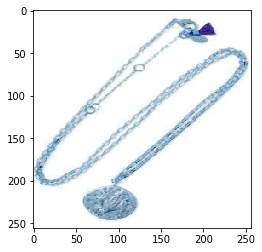

In [89]:
plt.imshow(read_novel_image(product_images[0], 256, 256))

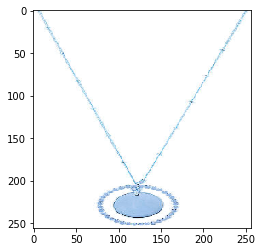

In [90]:
plt.imshow(read_novel_image(image_path, 256, 256))

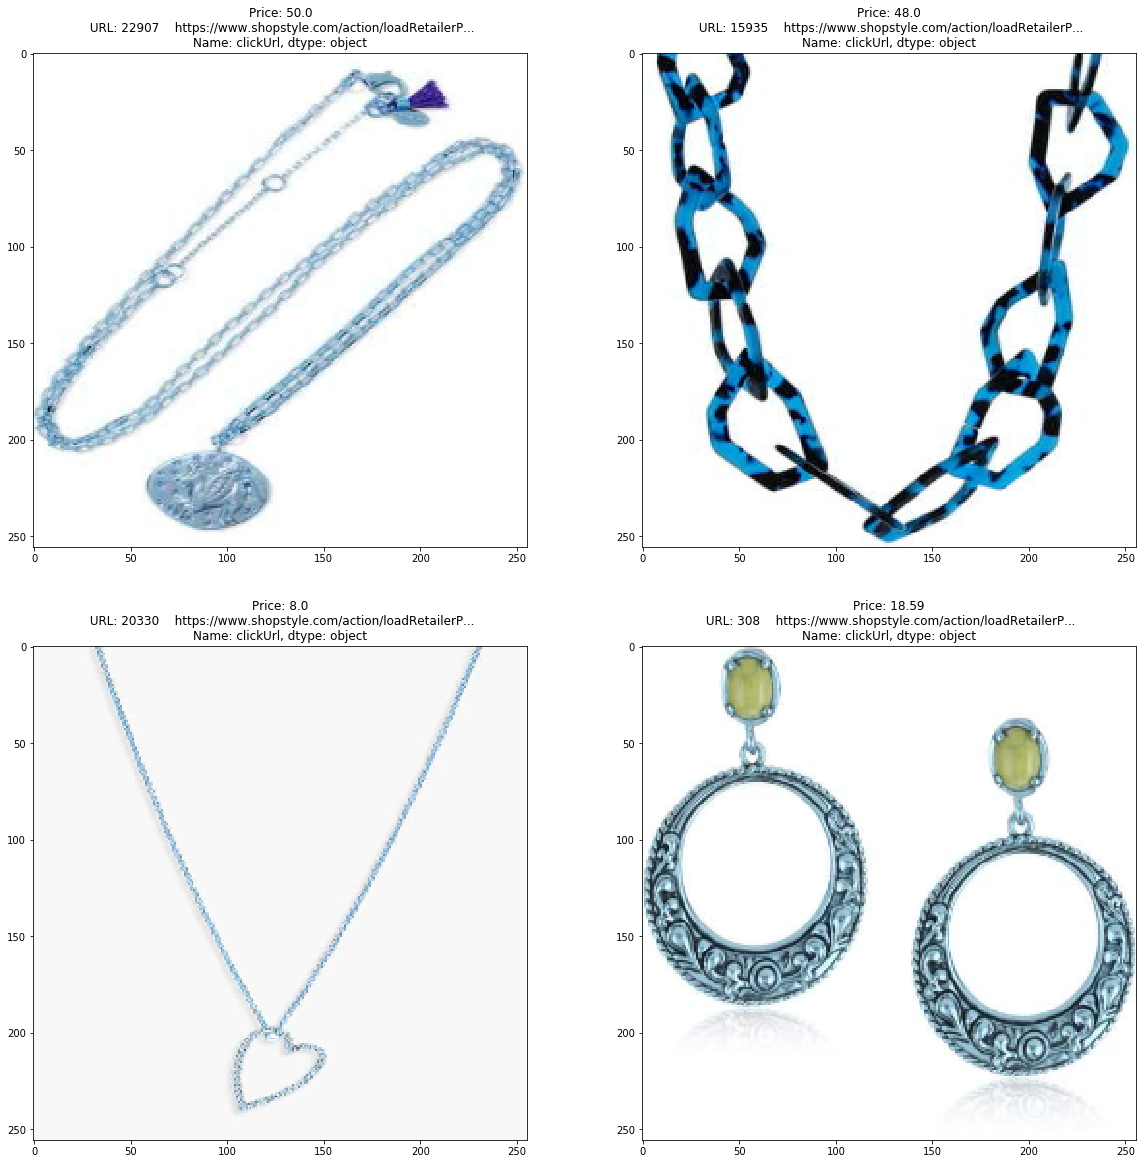

In [91]:
# n_neighbors of the test image
fig= plt.figure(figsize=(20, 20))
columns = 2
rows = 2


for i, idx in zip(range(0, columns*rows), filtered_products):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(read_novel_image(product_images[i], 256, 256))
    plt.title(f'Price: {product_prices[i]}\n URL: {product_urls[i]}')
plt.show()

In [92]:
## Decoded
decode_model = 'models/jewelry_cnn_decoder_necklaces_final.pkl'
decoder =  pickle.load(open(decode_model, 'rb'))
decoder.compile('adam', 'binary_crossentropy')

/Users/linhchau/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [98]:
decode_input = decoder.predict(norm_image.reshape(1,100,100,3))
decode_input.shape

(1, 13, 13, 8)

In [99]:
plt.imshow(decode_input.reshape(100,100,3))


ValueError: cannot reshape array of size 1352 into shape (100,100,3)

In [106]:
decode_input

array([[[[0.        , 0.79678804, 1.2695869 , ..., 0.6472722 ,
          0.8212808 , 0.05815898],
         [0.        , 0.51629573, 1.3032715 , ..., 0.46180487,
          0.98641413, 0.05028471],
         [0.        , 0.46142137, 1.270733  , ..., 0.37853897,
          0.67697436, 0.11692011],
         ...,
         [0.        , 0.48895591, 1.2823431 , ..., 0.39797455,
          0.74176955, 0.12396145],
         [0.        , 0.5851385 , 1.3934206 , ..., 0.5820306 ,
          0.71901333, 0.        ],
         [0.        , 0.47369486, 1.007623  , ..., 0.7294151 ,
          0.6412322 , 0.        ]],

        [[0.        , 0.824639  , 1.2305137 , ..., 0.46242905,
          0.5035782 , 0.17141613],
         [0.        , 0.8349018 , 1.2105298 , ..., 0.48081982,
          0.92576677, 0.        ],
         [0.        , 0.38957274, 1.1623008 , ..., 0.1597658 ,
          0.6242458 , 0.15616444],
         ...,
         [0.        , 0.5103629 , 1.2863325 , ..., 0.15218179,
          0.59040755, 0.1